<a href="https://colab.research.google.com/github/leandrorodor/PGR-IESB-P9043-CDNA-20203/blob/main/cross_validation_oob.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

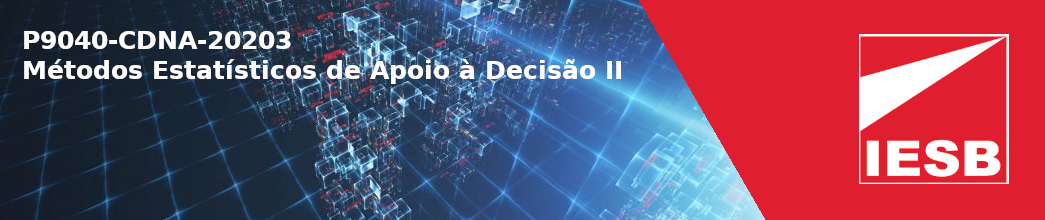

In [2]:
from IPython.display import Image
Image('/content/sample_data/banner_iesb_pos_colab_meadII.png')

## Cross Validation e OOB

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [4]:
# Importando a base
df_cardio = pd.read_csv('/content/sample_data/cardio_train.csv', sep=';')

df_cardio.shape

(70000, 13)

In [5]:
# Visualizando os dados
df_cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [6]:
# Tipos e tamanhos
df_cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [7]:
# Selecionando as colunas para treinamento
feats = [c for c in df_cardio.columns if c not in ['id', 'cardio']]

In [8]:
# Separando o dataframe
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_cardio, random_state = 42, test_size=0.1)

train, valid = train_test_split(train, random_state = 42, test_size=0.1)

train.shape, valid.shape, test.shape

((56700, 13), (6300, 13), (7000, 13))

In [9]:
# Treinando um modelo de RF Classifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42)

rf.fit(train[feats], train['cardio'])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [10]:
# Fazendo previsões com o modelo treinado na base de validação
preds_val = rf.predict(valid[feats])

preds_val

array([1, 0, 0, ..., 1, 1, 0])

In [11]:
# Visualizando os 3 primeiros registros da base de validação
valid.head(3)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
34622,49454,21960,2,175,86.0,140,90,3,1,1,1,0,0
59311,84688,18859,1,160,59.0,120,80,3,1,0,0,1,1
10918,15620,15463,2,174,69.0,120,80,1,1,0,0,1,0


In [12]:
# Visualizando os 3 últimos registros da base de validação
valid.tail(3)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
35717,51009,15991,1,163,80.0,140,90,1,1,1,0,1,1
64979,92744,19643,2,178,93.0,160,110,1,1,0,0,1,1
50094,71495,17703,2,164,61.0,110,70,1,1,0,0,1,0


In [13]:
# Verificando o desempenho de acordo com a métrica - base de validação
from sklearn.metrics import accuracy_score

accuracy_score(valid['cardio'], preds_val)

0.7139682539682539

In [15]:
# Vamos verificar qual o valor de base para a coluna target da base de validação
valid['cardio'].value_counts(normalize=True)

1    0.505873
0    0.494127
Name: cardio, dtype: float64

In [17]:
# Fazendo previsões com o modelo treinado na base de teste
preds_test = rf.predict(test[feats])

preds_test

array([1, 1, 1, ..., 0, 0, 1])

## Cross Validation

Conjunto de técnicas que usam os próprios dados de treinamento para realizar a validação do modelo.

Como o modelo deve ser validado com dados que não foram usados ainda, são aplicadas técnicas específicas para separar alguns dados de treino e assim realizar a validação.

A vantagem é não precisar dividir nossos dados de treino em conjuntos de treino e validação, já que a validação vai ser feita pelo Cross Validation. Isso é extremamente útil principalmente em conjunto de dados pequenos, onde a separação em treino e validação pode reduzir muito o conjunto de dados de treinamento e com isso comprometer o desempenho do modelo.

Um exemplo de técnica é o KFold, que divide os dados de treino em k iterações e para cada iteração uma amostra dos dados de treino é separada para fazer validação.

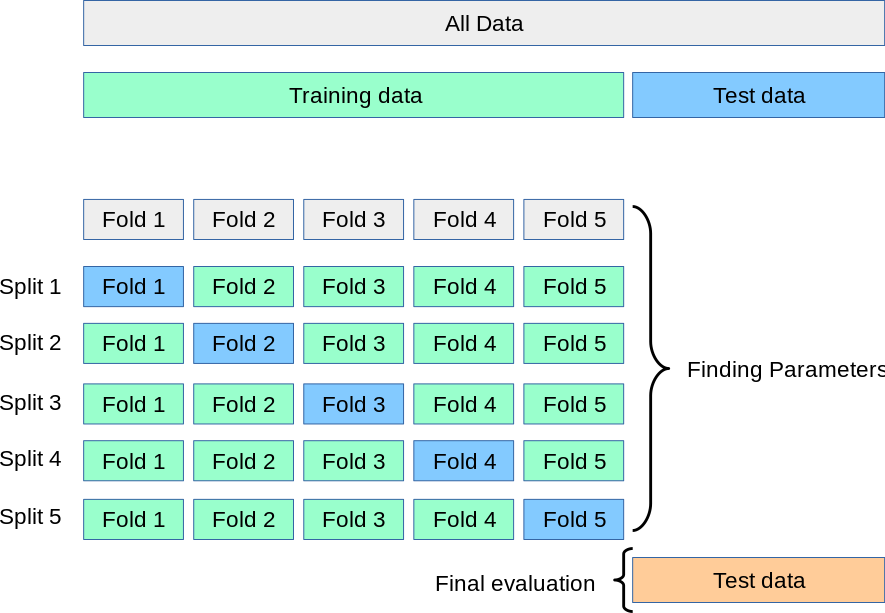

In [18]:
from IPython.display import Image
Image('/content/sample_data/grid_search_cross_validation.png')

In [19]:
train, test = train_test_split(df_cardio, random_state = 42, test_size=0.1)

train.shape, test.shape

((63000, 13), (7000, 13))

In [20]:
# Criando um modelo de RF Classifier e usando o Cross Validation
rf = RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42)

from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf, train[feats], train['cardio'], cv=5, n_jobs=-1)

scores

array([0.71460317, 0.71611111, 0.71380952, 0.71587302, 0.71452381])

In [20]:
# Médias dos scores de validação
scores.mean()

In [21]:
# Treinamento e fazendo previsões
rf.fit(train[feats], train['cardio'])

preds_test = rf.predict(test[feats])

accuracy_score(test['cardio'], preds_test)

0.72

## OOB - Out Of Bag

Inicialmente precisamos lembrar como funciona o modelo de random forest: são criadas diversas árvores de decisão que recebem amostras dos dados originais. Essas amostras são criadas de forma aleatória, com repetição.

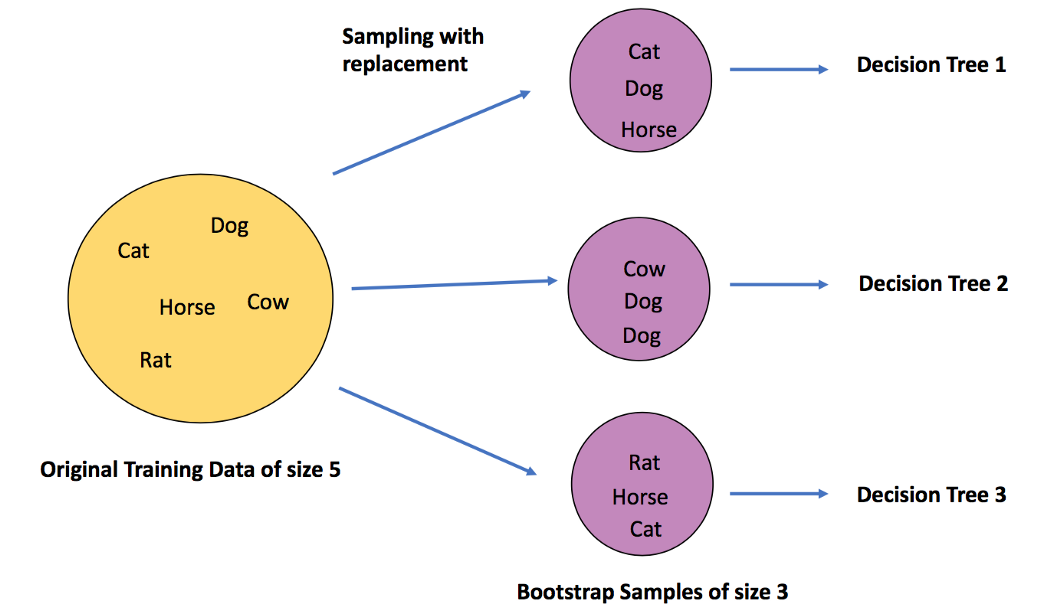

In [23]:
from IPython.display import Image
Image('/content/sample_data/1_ixvrbH45K8CcNZaj98JGuA.png')

É fácil notar que, em cada árvore criada, alguns dados foram usados e outros não. Ou seja, para cada árvore, alguns dados entraram na cesta de dados de treinamento, enquanto outros ficaram fora da cesta de treinamento (out of bag).

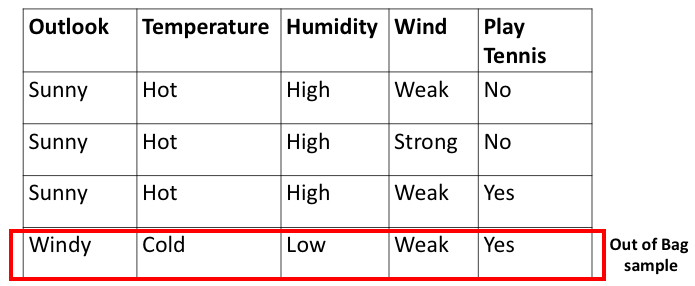

In [24]:
from IPython.display import Image
Image('/content/sample_data/1__J-O7FJ99a3Zehb3eUlqcg.png')

Para cada árvore existe um conjunto de dados que o modelo nunca viu, aqueles que ficaram fora da cesta de treinamento. Então, podemos usar esses dados nunca vistos pela árvore para fazer a validação da própria árvore, uma vez que precisamos de dados não usados no treinamento para realizarmos a validação.

Para usar o conceito de OOB e determinar que o modelo deve ser validado com o dados que ele mesmo deixou de fora do treinamento, basta usar o parâmetro oob_score = True no momento de instanciar o modelo de Randon Forest.

Mais uma vez, esse artifício é de grande valia para bases pequenas, pois não precisamos criar uma base de dados de validação, mas apenas usar para validação os dados que o próprio modelo descartou.

In [25]:
# Dividindo novamente os dados apenas em treino e teste
train, test = train_test_split(df_cardio, random_state = 42, test_size=0.1)

train.shape, test.shape

((63000, 13), (7000, 13))

In [26]:
# Treinando um modelo de RF Classifier usando oob_score
rf = RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42, oob_score=True)

rf.fit(train[feats], train['cardio'])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

In [27]:
# Fazendo previsões com o modelo treinado na base de teste
preds_test = rf.predict(test[feats])

accuracy_score(test['cardio'], preds_test)

0.72

## Melhorando os parâmetros do modelo Random Forest

In [28]:
# Treinando um modelo de RF Classifier
rf = RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42, oob_score=True,
                           min_samples_leaf=5, min_samples_split=20, max_depth=10)

rf.fit(train[feats], train['cardio'])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

In [29]:
# Fazendo previsões com o modelo treinado na base de teste
preds_test = rf.predict(test[feats])

accuracy_score(test['cardio'], preds_test)

0.7448571428571429